<a href="https://colab.research.google.com/github/manparodi/analisisPredictivo/blob/main/Examen_2_AnalisisPredictivo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias
import os
import pandas as pd
import numpy as np
import seaborn as sns #Graficos de outliers
import matplotlib.pyplot as plt
import statsmodels.api as sm #correlacion
from plotnine import * #ggplot
import statistics as stats 
import plotly as px
import scipy as sc
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot
import altair as alt
from sklearn.model_selection import train_test_split #separacion de dataset para Machine Learning
from sklearn import linear_model #Modelo lineal
from sklearn.tree import DecisionTreeRegressor #Arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #Para graficar arboles
from sklearn import metrics #accuracy
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
#import tensorflow as tf #Redes
#from tensorflow import keras #Redes
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier 
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/base_train.csv')
df

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,145.906176,90.576742,164.257910,65.339016,55.257411,2119.914136,108.063442,3.659766,3.413379,7.431662,126.769640,4800.000000,16.998459,21.094419,12310.083546
1,1,-1,92.733744,105.905393,187.256268,68.851686,53.507441,3086.763228,89.138707,3.693169,3.436936,9.335766,85.199136,5954.208367,16.835254,23.957619,22060.440471
2,2,0,87.620269,96.992974,172.988044,65.355847,55.275391,2353.623357,109.261573,3.481147,3.409794,8.625902,64.963110,5207.825450,27.964604,32.979688,9816.311817
3,3,2,107.851112,96.083754,166.746214,65.499869,51.568524,3117.821531,99.979531,3.598569,3.461714,10.262772,77.154984,4076.997829,26.991856,31.718865,8047.262818
4,4,3,149.361994,99.346480,178.441091,66.346505,51.047962,2602.065082,197.328140,3.069738,3.324375,9.444737,133.745785,4800.000000,14.244346,22.570794,14947.600683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,0,83.658143,94.464635,164.668036,64.364497,53.066057,2049.797249,83.945917,3.495773,3.426806,9.545828,67.806195,5331.121447,29.208904,33.618616,5459.501195
799996,799996,1,145.538826,96.587627,172.323536,69.384434,52.785967,1861.963918,177.790990,3.721636,3.178194,9.000000,79.753388,5000.690378,25.383693,32.465755,6485.135211
799997,799997,3,104.694181,94.673035,147.452392,63.834723,54.576642,2188.692947,109.545588,3.023910,3.115266,9.000000,132.011066,5285.591378,23.323227,32.641015,19840.018456
799998,799998,-1,124.292164,106.041770,191.237718,68.793550,55.120352,3191.518287,166.518411,3.458113,3.515844,17.884601,95.714254,4246.071448,28.469812,31.572519,26212.001467


In [ ]:
df["h*e"]=df["horsepower"]*df["engine-size"]

In [ ]:
df["horsepower_city"]=df["horsepower"]/df["city-mpg"]
df["horsepower_highway"]=df["horsepower"]/df["highway-mpg"]

In [ ]:
df["weight"]=df["curb-weight"]-df["engine-size"]

In [ ]:
df

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,highway-mpg,price,h*e,horsepower_city,horsepower_highway,weight,No trucks,No-trucks,no-trucks,horse-weight
0,0,0,145.906176,90.576742,164.257910,65.339016,55.257411,2119.914136,108.063442,3.659766,...,21.094419,12310.083546,13699.163640,7.457714,6.009629,2011.850694,1955.656226,1955.656226,1955.656226,1828.886586
1,1,-1,92.733744,105.905393,187.256268,68.851686,53.507441,3086.763228,89.138707,3.693169,...,23.957619,22060.440471,7594.540821,5.060757,3.556244,2997.624521,2899.506960,2899.506960,2899.506960,2814.307824
2,2,0,87.620269,96.992974,172.988044,65.355847,55.275391,2353.623357,109.261573,3.481147,...,32.979688,9816.311817,7097.971586,2.323048,1.969792,2244.361784,2180.635313,2180.635313,2180.635313,2115.672203
3,3,2,107.851112,96.083754,166.746214,65.499869,51.568524,3117.821531,99.979531,3.598569,...,31.718865,8047.262818,7713.919115,2.858454,2.432464,3017.842000,2951.075317,2951.075317,2951.075317,2873.920333
4,4,3,149.361994,99.346480,178.441091,66.346505,51.047962,2602.065082,197.328140,3.069738,...,22.570794,14947.600683,26391.806987,9.389395,5.925613,2404.736942,2423.623991,2423.623991,2423.623991,2289.878206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,0,83.658143,94.464635,164.668036,64.364497,53.066057,2049.797249,83.945917,3.495773,...,33.618616,5459.501195,5692.053218,2.321422,2.016924,1965.851332,1885.129213,1885.129213,1885.129213,1817.323018
799996,799996,1,145.538826,96.587627,172.323536,69.384434,52.785967,1861.963918,177.790990,3.721636,...,32.465755,6485.135211,14179.433808,3.141914,2.456539,1684.172928,1689.640382,1689.640382,1689.640382,1609.886994
799997,799997,3,104.694181,94.673035,147.452392,63.834723,54.576642,2188.692947,109.545588,3.023910,...,32.641015,19840.018456,14461.229847,5.660069,4.044331,2079.147359,2041.240555,2041.240555,2041.240555,1909.229489
799998,799998,-1,124.292164,106.041770,191.237718,68.793550,55.120352,3191.518287,166.518411,3.458113,...,31.572519,26212.001467,15938.185486,3.361956,3.031568,3024.999876,3000.280569,3000.280569,3000.280569,2904.566315


In [ ]:
df=df.iloc[:,1:22]
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,h*e,horsepower_city,horsepower_highway,weight,no-trucks
0,0,145.906176,90.576742,164.257910,65.339016,55.257411,2119.914136,108.063442,3.659766,3.413379,...,126.769640,4800.000000,16.998459,21.094419,12310.083546,13699.163640,7.457714,6.009629,2011.850694,1955.656226
1,-1,92.733744,105.905393,187.256268,68.851686,53.507441,3086.763228,89.138707,3.693169,3.436936,...,85.199136,5954.208367,16.835254,23.957619,22060.440471,7594.540821,5.060757,3.556244,2997.624521,2899.506960
2,0,87.620269,96.992974,172.988044,65.355847,55.275391,2353.623357,109.261573,3.481147,3.409794,...,64.963110,5207.825450,27.964604,32.979688,9816.311817,7097.971586,2.323048,1.969792,2244.361784,2180.635313
3,2,107.851112,96.083754,166.746214,65.499869,51.568524,3117.821531,99.979531,3.598569,3.461714,...,77.154984,4076.997829,26.991856,31.718865,8047.262818,7713.919115,2.858454,2.432464,3017.842000,2951.075317
4,3,149.361994,99.346480,178.441091,66.346505,51.047962,2602.065082,197.328140,3.069738,3.324375,...,133.745785,4800.000000,14.244346,22.570794,14947.600683,26391.806987,9.389395,5.925613,2404.736942,2423.623991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0,83.658143,94.464635,164.668036,64.364497,53.066057,2049.797249,83.945917,3.495773,3.426806,...,67.806195,5331.121447,29.208904,33.618616,5459.501195,5692.053218,2.321422,2.016924,1965.851332,1885.129213
799996,1,145.538826,96.587627,172.323536,69.384434,52.785967,1861.963918,177.790990,3.721636,3.178194,...,79.753388,5000.690378,25.383693,32.465755,6485.135211,14179.433808,3.141914,2.456539,1684.172928,1689.640382
799997,3,104.694181,94.673035,147.452392,63.834723,54.576642,2188.692947,109.545588,3.023910,3.115266,...,132.011066,5285.591378,23.323227,32.641015,19840.018456,14461.229847,5.660069,4.044331,2079.147359,2041.240555
799998,-1,124.292164,106.041770,191.237718,68.793550,55.120352,3191.518287,166.518411,3.458113,3.515844,...,95.714254,4246.071448,28.469812,31.572519,26212.001467,15938.185486,3.361956,3.031568,3024.999876,3000.280569


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   symboling          800000 non-null  int64  
 1   normalized-losses  800000 non-null  float64
 2   wheel-base         800000 non-null  float64
 3   length             800000 non-null  float64
 4   width              800000 non-null  float64
 5   height             800000 non-null  float64
 6   curb-weight        800000 non-null  float64
 7   engine-size        800000 non-null  float64
 8   bore               800000 non-null  float64
 9   stroke             800000 non-null  float64
 10  compression-ratio  800000 non-null  float64
 11  horsepower         800000 non-null  float64
 12  peak-rpm           800000 non-null  float64
 13  city-mpg           800000 non-null  float64
 14  highway-mpg        800000 non-null  float64
 15  price              800000 non-null  float64
dtypes:

# Analisis Exploratorio

In [ ]:
missing_values_count = df.isnull().sum()
porcentaje_missings = (missing_values_count/len(df))*100
porcentaje_missings

Unnamed: 0           0.0
symboling            0.0
normalized-losses    0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-size          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,399999.500000,0.665098,120.695944,98.066649,172.275287,65.552667,53.874303,2450.043601,117.976889,3.301791,3.239425,10.116760,95.236120,5059.604030,26.528302,32.008529,11440.896655
std,230940.252015,1.308882,35.132935,5.079410,11.110747,1.887964,2.255720,471.687720,29.559693,0.262890,0.300451,3.910799,29.834217,468.680836,5.876706,6.153806,5868.777693
min,0.000000,-3.000000,40.534787,82.937917,135.551814,61.012905,47.830953,1488.079382,47.038906,2.604898,1.710764,-12.104269,36.841507,3627.875879,9.229116,14.015803,-824.303969
25%,199999.750000,0.000000,95.420389,94.848705,166.163489,64.162091,52.322503,2094.919560,97.339422,3.104896,3.118024,8.646021,71.397541,4800.000000,22.941222,28.286595,7461.950887
50%,399999.500000,1.000000,113.360749,96.755825,172.258091,65.350276,53.945935,2345.278650,109.119021,3.250965,3.278219,9.000000,89.195405,5107.808994,26.171015,31.909073,9142.228511
75%,599999.250000,2.000000,142.491925,100.355036,178.959010,66.387566,55.307601,2748.879925,127.548995,3.528337,3.421338,9.359789,111.371022,5355.318469,29.577919,35.478786,13976.676702
max,799999.000000,3.000000,282.388034,120.491583,207.326158,74.819282,62.157243,4300.658928,270.101636,4.051284,4.184797,43.255678,232.513224,6975.934291,58.519152,61.303145,43392.412788


In [ ]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

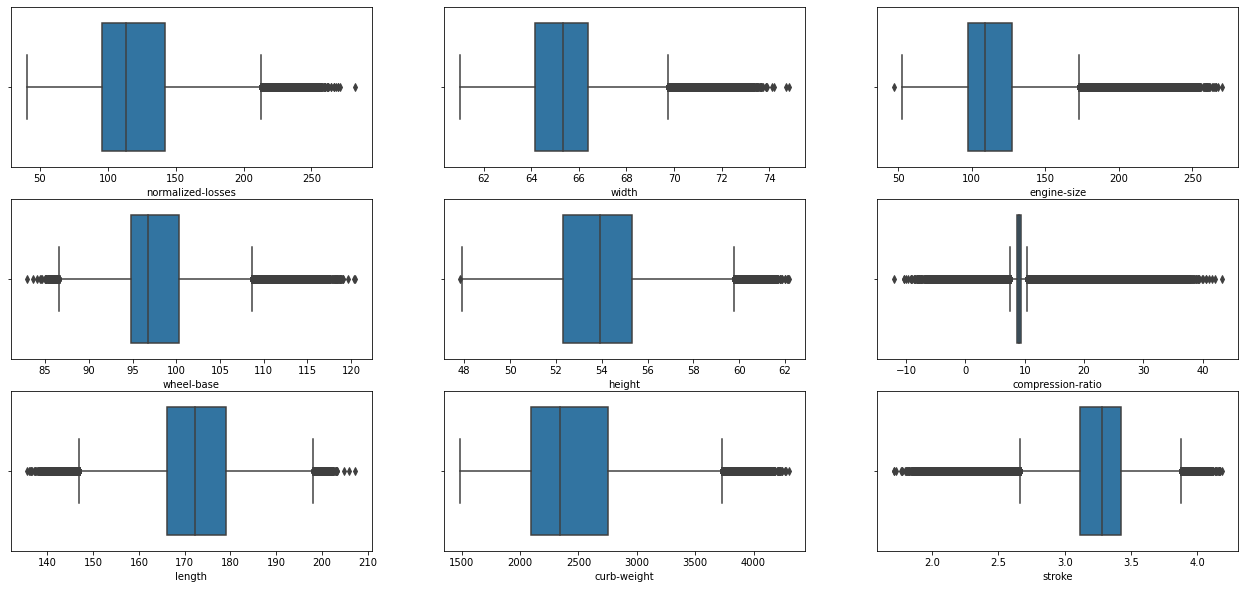

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(22, 10))

sns.boxplot(x=df["normalized-losses"],ax=axs[0,0])
sns.boxplot(x=df["wheel-base"],ax=axs[1,0])
sns.boxplot(x=df["length"],ax=axs[2,0])
sns.boxplot(x=df["width"],ax=axs[0,1])
sns.boxplot(x=df["height"],ax=axs[1,1])
sns.boxplot(x=df["curb-weight"],ax=axs[2,1])
sns.boxplot(x=df["engine-size"],ax=axs[0,2])
sns.boxplot(x=df["compression-ratio"],ax=axs[1,2])
sns.boxplot(x=df["stroke"],ax=axs[2,2])

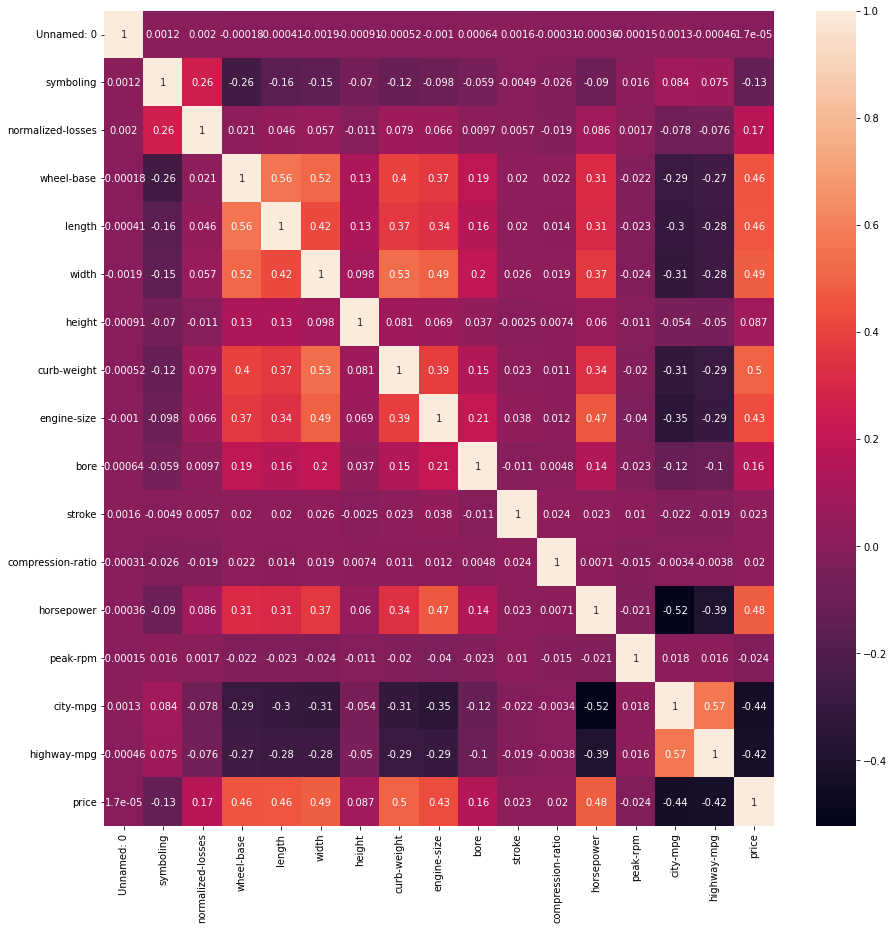

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.drop(columns=['price'])
y=df['price']

In [ ]:
#Separo los dato en entrenamiento y prueba para probar los algoritmos",
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state = 0)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(600000, 20)
(600000,)
(200000, 20)
(200000,)


(None, None)

In [ ]:
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
447507,2,79.252609,96.730586,161.945609,67.696594,54.074053,2367.319573,110.058258,3.351840,3.463346,8.884449,74.504923,5307.839578,29.146502,32.455348
15377,2,153.770760,104.919251,188.082208,63.395179,52.291111,1891.908841,97.191972,2.896485,3.634307,7.827183,68.353809,4800.000000,30.176661,28.341590
4559,0,169.413854,106.457225,186.405690,69.514745,50.379263,1989.352996,150.139638,3.854565,2.863576,9.000000,124.987396,4800.000000,17.483959,24.722067
80113,0,152.260520,109.692262,183.922428,69.234820,54.143666,3012.001200,174.982580,3.625400,3.140419,7.861292,141.223473,5850.681696,17.477221,27.302975
39573,0,122.748239,94.603948,171.409788,70.417341,53.776067,3483.201257,97.753858,3.207762,3.339096,9.477656,114.048139,4642.699114,20.013887,28.007378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0,185.704187,105.641562,183.359965,69.214399,51.098988,2420.410616,123.656982,3.128704,3.425175,7.040690,87.178091,4800.000000,29.024823,35.574429
152315,-1,98.601696,110.996972,181.621808,69.621802,56.158329,2647.890810,130.034130,3.671723,3.143701,8.341542,149.239056,5310.564368,17.352487,29.006647
117952,0,127.355559,100.074895,188.590402,65.981429,54.723160,2721.619492,163.901995,3.461802,3.444323,7.883433,183.477788,4800.000000,19.497170,22.569181
435829,1,94.340970,96.446295,189.044109,65.464822,56.894421,2785.907941,109.257451,3.149647,3.294725,9.266262,76.412683,5595.681104,18.569841,28.891308


In [ ]:
y_train

447507     7646.880858
15377      6584.993495
4559      23901.434285
80113     11706.882306
39573     17201.638548
              ...     
359783    20305.095593
152315    23762.099084
117952    12966.121558
435829     6591.174685
305711     9625.357851
Name: price, Length: 600000, dtype: float64

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#MODELO REGRESION MULTIPLE.
#Defino el algoritmo a utilizar",
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo",
lr_multiple.fit(X_train, y_train)

print(lr_multiple.coef_)
print(lr_multiple.intercept_)
print("Accuracy" , lr_multiple.score(X_train, y_train))
print("Accuracy test" , lr_multiple.score(X_test, y_test))

y_pred = lr_multiple.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

print("RMSE" , rmse)

[   2.3756165  -190.4416355   660.35153383  582.9753243   874.61189908
  612.00462955   15.40010554 1107.37304734  409.95985629   -8.43721495
   -5.35700978   63.76670544 1000.67120117  -14.71410647 -398.18049599
 -800.06321831]
11442.052916666664
Accuracy 0.4814659288230241
Accuracy test 0.48263690546160354
RMSE 4226.858413609956


In [ ]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 3.482e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        21:59:28   Log-Likelihood:            -5.8609e+06
No. Observations:              600000   AIC:                         1.172e+07
Df Residuals:                  599983   BIC:                         1.172e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.144e+04      5.457   2096.794      0.000    1.14e+04    1.15e+04
x1             2.3756      5.457      0.435      0.663      -8.320      13.071
x2          -190.4416      5.884    -32.367      0.000    -201.974    -178.909
x3           660.3515      5.716    115.525      0.000     649.148     671.555
x4           582.9753      7.318     79.660      0.000     568.632     597.319
x5           874.6119      6.848    127.717      0.000     861.190     888.034
x6           612.0046      7.389     82.823      0.000     597.522     626.487
x7            15.4001      5.521      2.789      0.005       4.579      26.221
x8          1107.3730      6.731    164.520      0.000    1094.181    1120.565
x9           409.9599      6.844     59.899      0.000     396.546     423.374
x10           -8.4372      5.649     -1.494      0.135     -19.510       2.635
x11           -5.3570      5.465     -0.980      0.327     -16.068       5.354
x12           63.7667      5.462     11.674      0.000      53.061      74.473
x13         1000.6712      6.965    143.668      0.000     987.020    1014.323
x14          -14.7141      5.464     -2.693      0.007     -25.423      -4.005
x15         -398.1805      7.288    -54.634      0.000    -412.465    -383.896
x16         -800.0632      6.768   -118.210      0.000    -813.329    -786.798
==============================================================================
Omnibus:                   163833.729   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490358.341
Skew:                           1.422   Prob(JB):                         0.00
Kurtosis:                       6.396   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Arboles. DecisionTreeRegressor
lista_accuracy_train = []
lista_accuracy_test = []

max_depths = [1,2,3,4,5,6,7,8,9,10,11,15]


for i in max_depths:
    regresor = DecisionTreeRegressor(random_state = 0 , max_depth=i)
    regresor = regresor.fit(X_train, y_train)

    y_train_pred = regresor.predict(X_train)
    y_test_pred = regresor.predict(X_test)

    lista_accuracy_train.append(regresor.score(X_train, y_train))
    lista_accuracy_test.append(regresor.score(X_test, y_test))
    print("Accuracy:",regresor.score(X_train, y_train))
    print("Accuracy test:",regresor.score(X_test, y_test))

Accuracy: 0.23808548053495604
Accuracy test: 0.23553392827229902
Accuracy: 0.351191837793819
Accuracy test: 0.34933892522979526
Accuracy: 0.41981254978479554
Accuracy test: 0.41842886963638093
Accuracy: 0.47043380670456847
Accuracy test: 0.4680519097603595
Accuracy: 0.5028608703668513
Accuracy test: 0.5012807865842844
Accuracy: 0.5289333187322602
Accuracy test: 0.5286056685133087
Accuracy: 0.5507923763100686
Accuracy test: 0.5489199250690501
Accuracy: 0.5720337854270419
Accuracy test: 0.5679271618487537
Accuracy: 0.591447535946565
Accuracy test: 0.5814731794954874
Accuracy: 0.6108642152196582
Accuracy test: 0.5927664793578009
Accuracy: 0.6314356020055891
Accuracy test: 0.5976148724830195
Accuracy: 0.7429625899399646
Accuracy test: 0.5359824419114423


Text(0, 0.5, 'Exactitud')

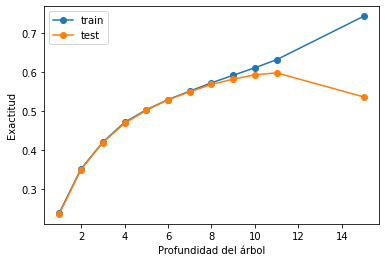

In [ ]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

In [ ]:
#Ad boost
#Chequear
rng = np.random.RandomState(1)
adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=300, random_state=rng)

adaboost.fit(X_train, y_train)

print("AdaBoostRegressor")
print("Accuracy:",adaboost.score(X_train, y_train))
print("Accuracy test:",adaboost.score(X_test, y_test))

AdaBoostRegressor
Accuracy: -0.15524615512833906
Accuracy test: -0.18731332778676957


# Bagging 

In [ ]:
bagging = BaggingRegressor(DecisionTreeRegressor())

bagging.fit(X_train, y_train)

print("BaggingRegressor")
print("Accuracy:",bagging.score(X_train, y_train))
print("Accuracy test:",bagging.score(X_test, y_test))

#Overfitting

BaggingRegressor
Accuracy: 0.9303804426752459
Accuracy test: 0.6164259467756759


# Random forest

In [ ]:
#RandomForest
random = RandomForestRegressor(max_depth=10, n_estimators=300, max_features=1)
random.fit(X_train, y_train)
print("RandomForestRegressor")
print("Accuracy:",random.score(X_train, y_train))
print("Accuracy test:",random.score(X_test, y_test))

RandomForestRegressor
Accuracy: 0.555104613050708
Accuracy test: 0.5466368083066381


In [ ]:
regr3 = RandomForestRegressor(max_depth=11,random_state=42)
fregr3 = regr3.fit(X_train,y_train)
r2_train = fregr3.score(X_train, y_train)
r2_test = fregr3.score(X_test, y_test)
print("Random Forest")
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)


Random Forest
r2_train:  0.6584391524693642
r2_test:  0.6303749459268262


In [ ]:
fila3 = []

for i in range(10,16,1):
  print(i)
  regr3 = RandomForestRegressor(max_depth=i,random_state=42)
  fregr3 = regr3.fit(X_train,y_train)
  r2_train = fregr3.score(X_train, y_train)
  r2_test = fregr3.score(X_test, y_test)
  fila3.append([i,r2_train,r2_test])
  #print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

10
11
12
13
14
15


In [ ]:
scores_profundidad2 = pd.DataFrame(fila3, columns=["max_depth","r2_train","r2_test"])
scores_profundidad2

,max_depth,r2_train,r2_test
0,10,0.634545,0.619271
1,11,0.658439,0.630375
2,12,0.685161,0.638623
3,13,0.713860,0.643979
4,14,0.743984,0.647474
5,15,0.774087,0.649737


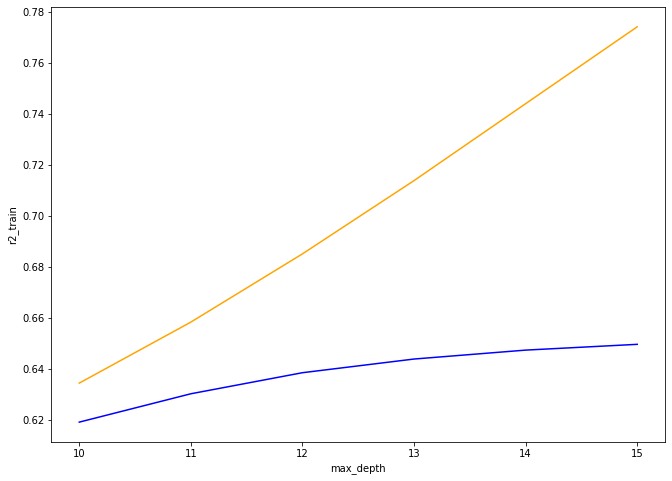

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores_profundidad2, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores_profundidad2, x="max_depth", y="r2_test", color = 'blue')

In [ ]:
fila4 = []

for i in range(100,300,30):
  regr2 = RandomForestRegressor(max_depth=11,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila4.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

KeyboardInterrupt: ignored

In [ ]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

# ExtraTrees

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
fila = []

for i in range(10,15,1):
  print(i)
  regr2 = ExtraTreesRegressor(max_depth=i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  #print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

10
11
12
13
14


In [ ]:
scores_profundidad = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores_profundidad

,max_depth,r2_train,r2_test
0,10,0.601017,0.594803
1,11,0.618529,0.605415
2,12,0.640276,0.616330
3,13,0.667120,0.625353
4,14,0.697803,0.632404


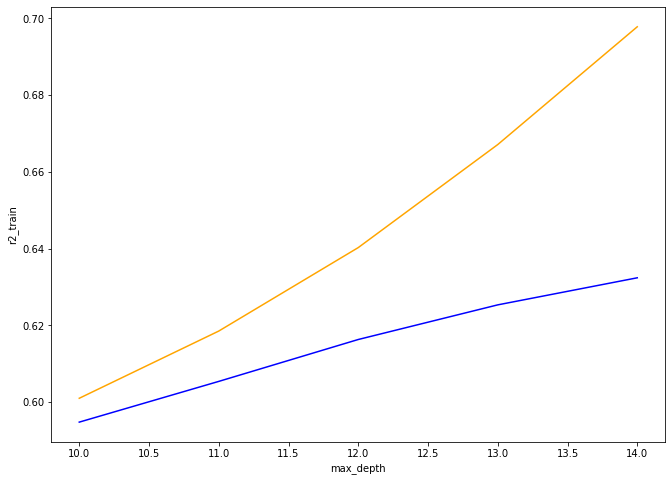

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_test", color = 'blue')

In [ ]:
fila2 = []

for i in range(155,500,50):
  regr2 = ExtraTreesRegressor(max_depth=5,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila2.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

In [ ]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

# XG Boost

In [ ]:
import xgboost as xgb

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10)
print(xgbr)

XGBRegressor(max_depth=10, verbosity=0)


In [ ]:
fila4 = []
for i in range(5,12,1):
  print(i)
  xgbr = xgb.XGBRegressor(verbosity=0, max_depth=i, learning_rate=0.1, n_estimators=350)
  fxgbr = xgbr.fit(X_train,y_train)
  r2_train = fxgbr.score(X_train, y_train)
  r2_test = fxgbr.score(X_test, y_test)
  fila4.append([i,r2_train,r2_test])

5
6
7
8
9
10
11


In [ ]:
scores_profundidad3 = pd.DataFrame(fila4, columns=["max_depth","r2_train","r2_test"])
scores_profundidad3

,max_depth,r2_train,r2_test
0,5,0.673404,0.664711
1,6,0.689339,0.672205
2,7,0.706984,0.676551
3,8,0.727371,0.679813
4,9,0.755470,0.681961
5,10,0.788379,0.682280
6,11,0.823760,0.681568


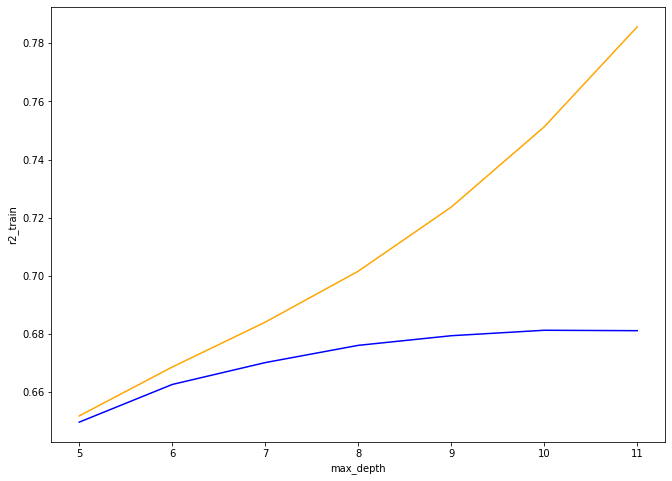

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores_profundidad3, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores_profundidad3, x="max_depth", y="r2_test", color = 'blue')

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10 , random_state=42)
print(xgbr)

XGBRegressor(max_depth=10, random_state=42, verbosity=0)


In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, n_estimators=350, random_state=42)

In [ ]:
regr = xgbr.fit(X_train,y_train)
r2_train= regr.score(X_train,y_train)
r2_test= regr.score(X_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)  

r2_train:  0.7940798977710615
r2_test:  0.6804978550326017


In [ ]:
scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.67


In [ ]:
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())

Mean cross-validation score para test: 0.66


In [ ]:
print(regr.feature_importances_)

[0.00465796 0.0787789  0.02770556 0.06264147 0.06884538 0.10309683
 0.01224452 0.30914924 0.04966266 0.01551822 0.01482365 0.01568884
 0.08137482 0.01337583 0.0543298  0.08810627]


# Ajuste de Hiperparametros

In [ ]:
params ={
    "leraning_rate"    : [0.1,0.12,0.15,0.17,0.2,0.25],
    "max_depth"        : [6,7,8,9,10,11],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
xgbr=xgb.XGBRegressor()

In [ ]:
random_search= RandomizedSearchCV(xgbr, param_distributions = params, n_iter = 5, n_jobs = -1, cv=5, verbose = 0)

In [ ]:
random_search.fit(X,y)

[18:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'leraning_rate': [0.1, 0.12, 0.15, 0.17,
                                                          0.2, 0.25],
                                        'max_depth': [6, 7, 8, 9, 10, 11],
                                        'min_child_weight': [1, 3, 5, 7]})

In [ ]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.7, gamma=0.2, leraning_rate=0.12, max_depth=10,
             min_child_weight=7)

In [ ]:
classifier = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, leraning_rate=0.12, max_depth=10,
             min_child_weight=7)

In [ ]:
classifier.fit(X_train,y_train)

[23:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, gamma=0.2, leraning_rate=0.12, max_depth=10,
             min_child_weight=7)

In [ ]:
score = cross_val_score(classifier, X, y, cv=5)

[22:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
score

array([0.67694431, 0.68072076, 0.67896072, 0.68195458, 0.67754355])

In [ ]:
score.mean()

0.6792247854064216

In [ ]:
#n_estimators: 350
#subsample
#max_depth:10
#ETA: 0.1, 0.15 (Chequear con cv)
#min_split_losses
#min_child_weight: (chequear con cv)
#booster
#cs_bytree=1

ETA = [0.05,0.1,0.2,]
for i in ETA:
  xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=i)
  regr=xgbr.fit(X_train,y_train)
  r2_train= regr.score(X_train,y_train)
  r2_test= regr.score(X_test,y_test)
  print("r2_train: ", r2_train)
  print("r2_test: ", r2_test) 


In [ ]:
MCW = [1,3,5,]
for i in MCW:
  xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=i)
  regr=xgbr.fit(X_train,y_train)
  r2_train= regr.score(X_train,y_train)
  r2_test= regr.score(X_test,y_test)
  print("r2_train: ", r2_train)
  print("r2_test: ", r2_test) 

r2_train:  0.7500731047321006
r2_test:  0.6813954602998529
r2_train:  0.7518270063960258
r2_test:  0.6813284576225609
r2_train:  0.7498358671949825
r2_test:  0.6811813158718875


In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=1, n_estimators=100)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=3,n_estimators=100)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=5,n_estimators=100)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())


KeyboardInterrupt: ignored

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.15)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10)
scores = cross_val_score(xgbr, X_test, y_test, cv=5)
print("Mean cross-validation score para test: %.2f" % scores.mean())

In [ ]:
fila = []

for i in range(50,500,50):
  xgbr = xgb.XGBRegressor(max_depth=10,n_estimators=i,learning_rate=0.1)
  regr = xgbr.fit(X_train,y_train)

  r2_train = regr.score(X_train, y_train)
  r2_test = regr.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

In [ ]:
cs_bytree = [0,0.5,1,]
for i in cs_bytree:
  xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=1, colsample_bytree=i)
  regr=xgbr.fit(X_train,y_train)
  r2_train= regr.score(X_train,y_train)
  r2_test= regr.score(X_test,y_test)
  print("r2_train: ", r2_train)
  print("r2_test: ", r2_test) 

r2_train:  0.5376878925163955
r2_test:  0.5193470867701302
r2_train:  0.7421355787741601
r2_test:  0.6741675700683811
r2_train:  0.7500731047321006
r2_test:  0.6813954602998529


In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, min_child_weight=1, colsample_bytree=1, subsample=0.5)
regr=xgbr.fit(X_train,y_train)
r2_train= regr.score(X_train,y_train)
r2_test= regr.score(X_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test) 

r2_train:  0.7397723072472766
r2_test:  0.6755595262774893


# Salida

In [ ]:
val = pd.read_csv('gdrive/My Drive/base_val.csv')

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,800000,0,85.318187,95.412711,150.381171,62.860786,56.593664,2686.065670,97.277160,3.145108,3.473832,9.286915,67.500165,5326.053045,34.685279,35.559916
1,800001,2,102.883810,108.220755,194.609357,68.581229,59.151753,3120.286937,128.318062,3.537661,3.124789,9.437005,156.253249,4419.617727,25.503960,32.172170
2,800002,-1,98.642203,105.677658,192.067863,68.066744,59.284799,3188.739691,162.396774,3.467539,3.612313,11.151981,148.853050,4445.835044,19.171108,21.165284
3,800003,1,151.954162,110.425237,186.908847,69.545757,55.724412,1664.942950,88.748653,3.143084,3.414693,7.129362,108.458068,5405.757323,26.469365,47.098723
4,800004,-3,78.062615,90.921245,164.132218,65.206676,54.712601,2629.804779,117.460687,3.635660,3.109688,8.718653,155.637278,5380.793044,19.215208,42.676058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999995,1,131.889643,94.683822,152.600348,63.753260,55.058248,1898.035998,94.051597,3.135750,2.333443,9.000000,64.637229,5215.317878,39.611105,32.011279
199996,999996,1,111.525916,94.187341,164.683562,64.375117,50.068405,1838.700404,86.107942,3.260747,3.388072,7.344748,63.710452,5356.350668,41.574036,36.153130
199997,999997,3,142.307625,111.712965,189.704961,68.347307,52.333088,2750.380050,166.112965,3.166962,3.328309,9.272152,146.966438,5207.106730,29.562491,32.558169
199998,999998,1,83.784384,92.137350,188.034886,65.029247,52.375108,2322.327103,101.061642,3.189305,3.054712,8.763895,68.864198,5201.943517,24.321078,36.973930


In [ ]:
val

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,h*e,horsepower_city,horsepower_highway,weight
0,800000,0,85.318187,95.412711,150.381171,62.860786,56.593664,2686.065670,97.277160,3.145108,3.473832,9.286915,67.500165,5326.053045,34.685279,35.559916,6566.224351,1.946075,1.898209,2588.788510
1,800001,2,102.883810,108.220755,194.609357,68.581229,59.151753,3120.286937,128.318062,3.537661,3.124789,9.437005,156.253249,4419.617727,25.503960,32.172170,20050.114093,6.126627,4.856783,2991.968875
2,800002,-1,98.642203,105.677658,192.067863,68.066744,59.284799,3188.739691,162.396774,3.467539,3.612313,11.151981,148.853050,4445.835044,19.171108,21.165284,24173.255120,7.764447,7.032887,3026.342917
3,800003,1,151.954162,110.425237,186.908847,69.545757,55.724412,1664.942950,88.748653,3.143084,3.414693,7.129362,108.458068,5405.757323,26.469365,47.098723,9625.507442,4.097494,2.302782,1576.194297
4,800004,-3,78.062615,90.921245,164.132218,65.206676,54.712601,2629.804779,117.460687,3.635660,3.109688,8.718653,155.637278,5380.793044,19.215208,42.676058,18281.261597,8.099693,3.646946,2512.344092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999995,1,131.889643,94.683822,152.600348,63.753260,55.058248,1898.035998,94.051597,3.135750,2.333443,9.000000,64.637229,5215.317878,39.611105,32.011279,6079.234613,1.631796,2.019202,1803.984401
199996,999996,1,111.525916,94.187341,164.683562,64.375117,50.068405,1838.700404,86.107942,3.260747,3.388072,7.344748,63.710452,5356.350668,41.574036,36.153130,5485.975906,1.532458,1.762239,1752.592462
199997,999997,3,142.307625,111.712965,189.704961,68.347307,52.333088,2750.380050,166.112965,3.166962,3.328309,9.272152,146.966438,5207.106730,29.562491,32.558169,24413.030772,4.971382,4.513965,2584.267085
199998,999998,1,83.784384,92.137350,188.034886,65.029247,52.375108,2322.327103,101.061642,3.189305,3.054712,8.763895,68.864198,5201.943517,24.321078,36.973930,6959.528925,2.831462,1.862507,2221.265461


In [ ]:
df


,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,h*e,horsepower_city,horsepower_highway,weight
0,0,0,145.906176,90.576742,164.257910,65.339016,55.257411,2119.914136,108.063442,3.659766,...,7.431662,126.769640,4800.000000,16.998459,21.094419,12310.083546,13699.163640,7.457714,6.009629,2011.850694
1,1,-1,92.733744,105.905393,187.256268,68.851686,53.507441,3086.763228,89.138707,3.693169,...,9.335766,85.199136,5954.208367,16.835254,23.957619,22060.440471,7594.540821,5.060757,3.556244,2997.624521
2,2,0,87.620269,96.992974,172.988044,65.355847,55.275391,2353.623357,109.261573,3.481147,...,8.625902,64.963110,5207.825450,27.964604,32.979688,9816.311817,7097.971586,2.323048,1.969792,2244.361784
3,3,2,107.851112,96.083754,166.746214,65.499869,51.568524,3117.821531,99.979531,3.598569,...,10.262772,77.154984,4076.997829,26.991856,31.718865,8047.262818,7713.919115,2.858454,2.432464,3017.842000
4,4,3,149.361994,99.346480,178.441091,66.346505,51.047962,2602.065082,197.328140,3.069738,...,9.444737,133.745785,4800.000000,14.244346,22.570794,14947.600683,26391.806987,9.389395,5.925613,2404.736942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,0,83.658143,94.464635,164.668036,64.364497,53.066057,2049.797249,83.945917,3.495773,...,9.545828,67.806195,5331.121447,29.208904,33.618616,5459.501195,5692.053218,2.321422,2.016924,1965.851332
799996,799996,1,145.538826,96.587627,172.323536,69.384434,52.785967,1861.963918,177.790990,3.721636,...,9.000000,79.753388,5000.690378,25.383693,32.465755,6485.135211,14179.433808,3.141914,2.456539,1684.172928
799997,799997,3,104.694181,94.673035,147.452392,63.834723,54.576642,2188.692947,109.545588,3.023910,...,9.000000,132.011066,5285.591378,23.323227,32.641015,19840.018456,14461.229847,5.660069,4.044331,2079.147359
799998,799998,-1,124.292164,106.041770,191.237718,68.793550,55.120352,3191.518287,166.518411,3.458113,...,17.884601,95.714254,4246.071448,28.469812,31.572519,26212.001467,15938.185486,3.361956,3.031568,3024.999876


In [ ]:
val["h*e"]=val["horsepower"]*val["engine-size"]
val["horsepower_city"]=val["horsepower"]/val["city-mpg"]
val["horsepower_highway"]=val["horsepower"]/val["highway-mpg"]
val["weight"]=val["curb-weight"]-val["engine-size"]

In [ ]:
pred_val=classifier.predict(val)

In [ ]:
pred_val=classifier.predict(val.iloc[:,0:22])

In [ ]:
solution=pd.DataFrame(data={"price":pred_val}).astype(str)
solution.index = val.iloc[:,0]
print(solution)

                price
Unnamed: 0           
800000      7311.6416
800001      18885.506
800002      22552.332
800003       14014.51
800004      13654.124
...               ...
999995       6063.892
999996        6810.79
999997      12948.404
999998      7963.0317
999999      7810.0645

[200000 rows x 1 columns]


In [ ]:
solution.describe()

,price
count,200000
unique,198605
top,6868.965
freq,3


In [ ]:
from google.colab import files

In [ ]:
solution.to_csv("val2.csv",sep=',',index=True, index_label='id')
files.download('val2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>